In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%aimport util.models
%aimport util.func.sobel_funcs

2022-12-09 23:17:53.187223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 23:17:53.537753: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
import os

import joblib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import display
from PIL import Image, ImageFilter
from tensorflow.keras.layers import Layer
from tensorflow.keras.losses import Loss
from tensorflow.keras.models import Model, Sequential

from util.models import new_model
from util.func.sobel_funcs import SobelEdges

In [4]:
image_bytes = tf.io.read_file("./data/screw/train/good/004.png") 
img_tensor = tf.image.decode_image(image_bytes)
img_tensor = tf.cast(img_tensor, tf.float32)
img_tensor = tf.image.resize(img_tensor, [200, 200])
width, height, channels = img_tensor.shape

2022-12-09 23:17:59.093323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1026] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-09 23:17:59.121775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1026] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-09 23:17:59.121841: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1026] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-09 23:17:59.135350: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:1026] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-09 23:17:59.135463: I tensorflow/com

In [5]:
img_tensor = tf.expand_dims(img_tensor, 0)
img_tensor.shape

TensorShape([1, 200, 200, 1])

In [6]:
output = tf.image.sobel_edges(img_tensor)
output_x = np.asarray(output[0, :, :, :, :0])
output_y = np.asarray(output[0, :, :, :, 1])

2022-12-09 23:18:03.678521: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600


In [7]:
edge_data = np.sqrt(output_x**2 + output_y**2)

TypeError: Invalid shape (200, 200, 200, 0) for image data

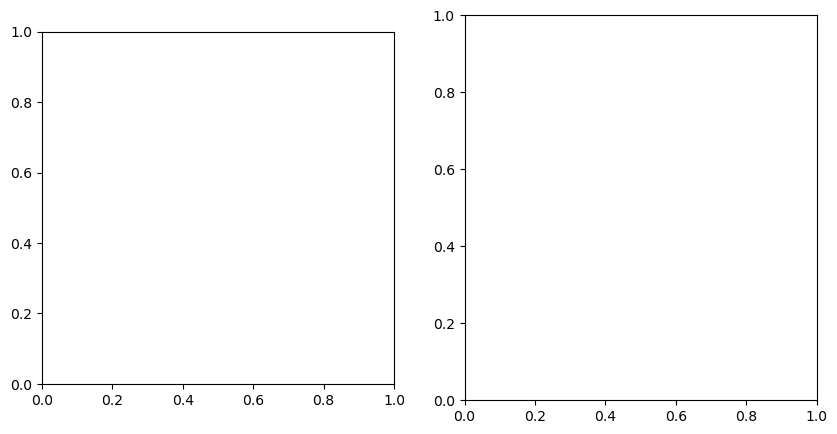

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(edge_data, cmap='gray')
ax2.imshow(output_y)
plt.show()

TypeError: Invalid shape (200, 200, 200, 0) for image data

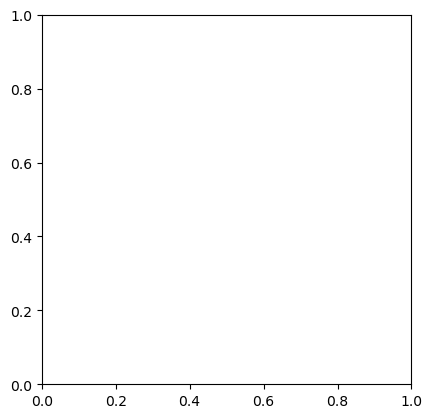

In [9]:
edges = np.sqrt(output_x**2 + output_y**2)
plt.imshow(edges, cmap='gray')
plt.show()

In [ ]:
img_blur = Image.open('./data/screw/train/good/049.png')
img_blur = img_blur.filter(ImageFilter.GaussianBlur(radius=5))

In [ ]:
img_blur = np.array(img_blur, dtype='float')
print(img_blur.shape)
img_blur_t = tf.reshape(tf.convert_to_tensor(img_blur, dtype=tf.float32), [1, 1024, 1024, 1])

In [ ]:
plt.imshow(img_blur, cmap="gray")

In [ ]:
blur_edges = tf.image.sobel_edges(img_blur_t)
x_t = np.asarray(blur_edges[0, :, :, :, 0])
y_t = np.asarray(blur_edges[0, :, :, :, 1])
edges_new = np.sqrt(x_t**2 + y_t**2)

In [ ]:
plt.imshow(edges_new, cmap='gray')

In [ ]:
edge_obj = SobelEdges("./data/metal_nut/train/good/002.png", blur=3)
edge_obj.display_edges(cmap='gray')

In [ ]:
screw_edges = SobelEdges("./data/screw/test/manipulated_front/011.png", blur=0, resize=(200, 200))
fig, ax = screw_edges.display_edges(cmap='gray')
ax.axis('off')